# MATH 210 Introduction to Mathematical Computing

**March 21, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Lotka-Volterra Competition Model

$$
\begin{align*}
u_0' &= u_0(1 - u_0 - u_1/\alpha) \\
u_1' &= \delta u_1(1 - u_0/\beta - u_1)
\end{align*}
$$

for $\alpha > 1$, $\beta > 1$, $\delta > 0$.

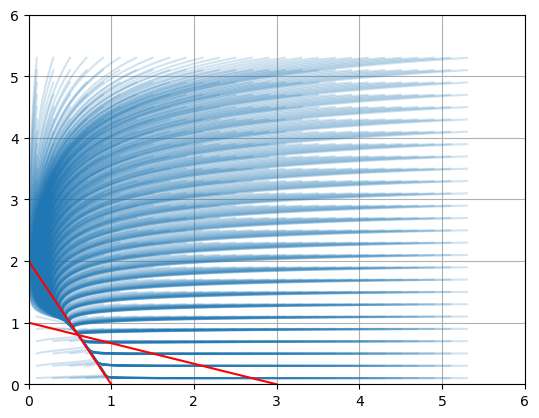

In [2]:
alpha = 2; beta = 3; delta = 0.1;

f = lambda u,t: np.array([ u[0]*(1 - u[0] - u[1]/alpha) , delta*u[1]*(1 - u[0]/beta - u[1]) ])

for u0 in np.arange(0.1,5.5,0.2):
    for u1 in np.arange(0.1,5.5,0.2):
        U0 = [u0,u1]
        t = np.linspace(0,20,5000)
        U = spi.odeint(f,U0,t)
        plt.plot(U[:,0],U[:,1],'C0',alpha=0.2)

plt.plot([0,1],[alpha,0],'r')
plt.plot([0,beta],[1,0],'r')
plt.xlim([0,6]), plt.ylim([0,6]), plt.grid(True)
plt.show()

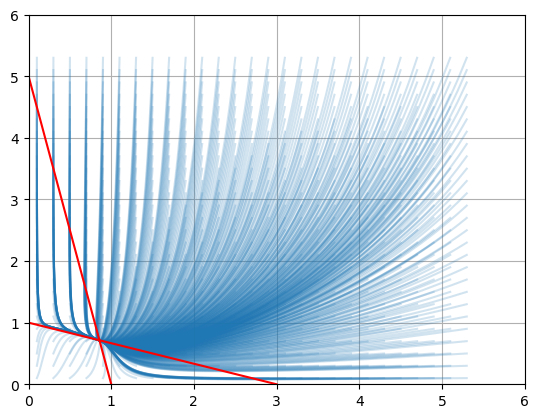

In [3]:
alpha = 5; beta = 3; delta = 3;

f = lambda u,t: np.array([ u[0]*(1 - u[0] - u[1]/alpha) , delta*u[1]*(1 - u[0]/beta - u[1]) ])

for u0 in np.arange(0.1,5.5,0.2):
    for u1 in np.arange(0.1,5.5,0.2):
        U0 = [u0,u1]
        t = np.linspace(0,20,5000)
        U = spi.odeint(f,U0,t)
        plt.plot(U[:,0],U[:,1],'C0',alpha=0.2)

plt.plot([0,1],[alpha,0],'r')
plt.plot([0,beta],[1,0],'r')
plt.xlim([0,6]), plt.ylim([0,6]), plt.grid(True)
plt.show()

## Euler 3-Body Problem

See [Mathematical Python > Differential Equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/systems/#eulers-3-body-problem).

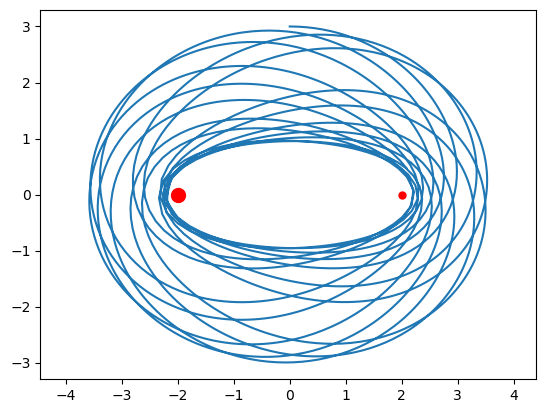

In [4]:
G = 4*np.pi**2 # Gravitational constant
S1 = [-2,0] # Coordinates of Star 1
S2 = [2,0] # Coordinates of Star 2
M1 = 2 # Mass of Star 1 (in solar mass)
M2 = 1 # Mass of Star 2 (in solar mass)

def f(u,t):
    d1 = np.linalg.norm([u[0] - S1[0],u[2] - S1[1]])
    d2 = np.linalg.norm([u[0] - S2[0],u[2] - S2[1]])
    dudt = [0,0,0,0]
    dudt[0] = u[1]
    dudt[1] = -G*M1*(u[0] - S1[0])/d1**3 - G*M2*(u[0] - S2[0])/d2**3
    dudt[2] = u[3]
    dudt[3] = -G*M1*(u[2] - S1[1])/d1**3 - G*M2*(u[2] - S2[1])/d2**3
    return dudt

u0 = [0,5,3,0] # Initial conditions of the planet: [xposition,xvelocity,yposition,yvelocity]
t = np.linspace(0,30,2000) # Array of time values (in years)
u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
plt.axis('equal')
plt.show()